In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fgspectra.power, fgspectra.frequency, fgspectra.models

## Initialize Models
We create an object for each component, and put it into a list. They have ACT defaults, but you could pass in some parameters here if you wanted to keep something fixed, for example.

In [3]:
import fgspectra.models

# define a list of components
components = [
    fgspectra.models.ThermalSZ(),
    fgspectra.models.KinematicSZ(),
    fgspectra.models.CIBP(),
    fgspectra.models.CIBC(),
    fgspectra.models.tSZxCIB(),
    fgspectra.models.RadioPointSources(),
    fgspectra.models.GalacticCirrus()
]

# annoying effective frequencies list: must change this interface
f0_sz     =146.9
f0_synch  =147.6
f0_dust   =149.7
f1_sz     =220.2
f1_synch  =217.6
f1_dust   =219.6
eff_freq = [[f0_sz, f1_sz], [f0_sz, f1_sz], [f0_dust, f1_dust], [f0_dust, f1_dust],
            [f0_dust, f1_dust], [f0_synch, f1_synch], [f0_dust, f1_dust] ]

## Compute Secondaries
Following the interface for `CLASS`, we pass in a dictionary to `{your component}.get_mix()` and get our results! The output mixing matrix is of dimension $N_{req} \times N_{freq} \times \ell_{max}$, with each subvector corresponding to the secondary power spectrum $s_{\ell}^{f_1 f_2}$.

In [4]:
test_par = {
    'a_tSZ' : 4.66,
    'a_kSZ' : 1.60,
    'a_p' : 6.87,
    'beta_p' : 2.08,
    'a_c' : 6.10,
    'beta_c' : 2.08,
    'n_CIBC' : 1.20,
    'xi' : 0.09,
    'a_s' :3.50,
    'a_g' :0.88,
    
    'f0_sz' :146.9,
    'f0_synch'  :147.6,
    'f0_dust'   :149.7,
    'f1_sz'     :220.2,
    'f1_synch'  :217.6,
    'f1_dust'   :219.6
}

l_max = 10000

def secondaries(par):
    """returns mixing matrix """
    return ([comp.get_mix(freqs=freq, l_max=l_max, **par) 
            for comp, freq in zip(components, eff_freq)])

mix_result = secondaries(test_par)
sec11_3000 = ( [m[0,0,3000] for m in mix_result])

/home/zequnl/Projects/fgspectra/fgspectra/models.py:269: RuntimeWarning: divide by zero encountered in power
  ) * (mu_i * mu_j / mu_0**2)
/home/zequnl/Projects/fgspectra/fgspectra/models.py:269: RuntimeWarning: invalid value encountered in multiply
  ) * (mu_i * mu_j / mu_0**2)
/home/zequnl/Projects/fgspectra/fgspectra/models.py:413: RuntimeWarning: divide by zero encountered in power
  par['nu_0']**2)**par['beta_g'] * (self.cib.g(nu_i, par['T_CMB']) *


## Comparison with Dunkley et al. 2013
We recover floating point agreement with the existing code. Gotta put this into a unit test!

In [5]:
# OUTPUT FROM ERMINIA/JO FORTRAN CODE
dunk13 = np.array( [5.04810070670028, 1.60000000000000, 6.79588405229860, 
                    6.03620247694243, -0.993450058059464, 3.66974746746919, 0.870032016703448] )

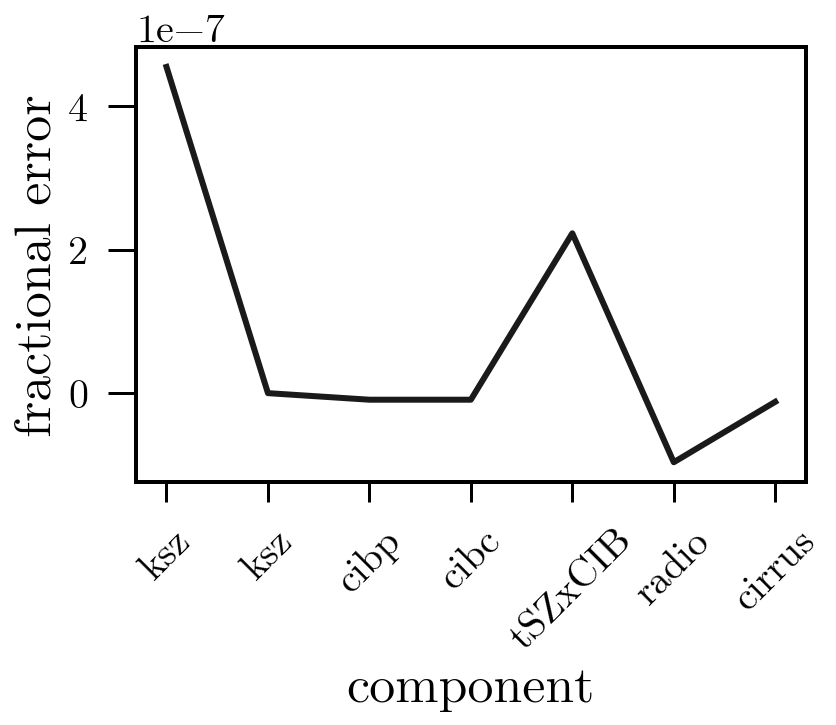

In [6]:
plt.plot( (sec11_3000 - dunk13) / dunk13 )
plt.xticks(range(len(components)), ['ksz', 'ksz', 'cibp', 'cibc', 'tSZxCIB', 'radio', 'cirrus'], rotation=45)
plt.xlabel('component')
plt.ylabel('fractional error');